In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [85]:
wbc_p = pd.read_csv('./국대_투수.csv', encoding = 'cp949')
wbc_b = pd.read_csv('./국대_타자.csv', encoding = 'cp949')
kbo_p = pd.read_csv('./kbo_투수2.csv', encoding = 'cp949')
kbo_b = pd.read_csv('./kbo_타자2.csv', encoding = 'cp949')

In [86]:
wbc_b.head()

,이름,팀,G,타석,타수,득점,안타,2타,3타,홈런,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,최정,국가대표,121,505,414,80,110,21,0,26,...,0,6,0.266,0.386,0.505,0.891,0.400,145.4,5.15,3.72
1,김혜성,국가대표,129,566,516,81,164,18,7,4,...,0,3,0.318,0.373,0.403,0.776,0.360,123.9,4.80,1.26
2,오지환,국가대표,142,569,494,75,133,16,4,25,...,3,3,0.269,0.357,0.470,0.827,0.372,138.6,5.77,2.56
3,박병호,국가대표,124,487,429,72,118,17,0,35,...,0,6,0.275,0.349,0.559,0.909,0.399,147.8,3.85,3.71
4,강백호,국가대표,62,264,237,24,58,12,0,6,...,1,2,0.245,0.312,0.371,0.683,0.312,88.8,0.02,0.16


# 타자 세이버 지표 추가

In [100]:
#타자

#GPA 지표 추가
wbc_b['GPA'] = (wbc_b['출루']*1.8 + wbc_b['장타'])/4

#XR 지표 추가
wbc_b['XR'] = (wbc_b['안타']-wbc_b['2타']-wbc_b['3타']-wbc_b['홈런'])*0.5 + wbc_b['2타']*0.72 + wbc_b['3타']*1.04 + wbc_b['홈런']*1.44 + (wbc_b['볼넷']-wbc_b['사구'])*0.34 + wbc_b['고4']*0.25 + wbc_b['도루']*0.18 -  wbc_b['도실']*0.32 - (wbc_b['타수']-wbc_b['안타']-wbc_b['삼진'])*0.09 - wbc_b['삼진']*0.098 - wbc_b['병살']*0.37 + wbc_b['희비']*0.37 + wbc_b['희타']*0.04

#XR27 지표 추가
wbc_b['XR27'] = (wbc_b['XR']/(wbc_b['타석']-wbc_b['안타']+wbc_b['희타']+wbc_b['희비']+wbc_b['도실']+wbc_b['병살'])) * 27

#RC27 지표 추가
#RC = A*B/C  A = 안타+볼넷+사구-도실-병살, B = 루타 + 0.26(볼넷-고4+사구) + 0.52*(희타+희비+도루), C = 타석 + 볼넷 + 사구 + 희타 + 희비 
#RC27 = RC/(타석-안타+희타+희비+도실+병살)*27

wbc_b['A'] = wbc_b['안타'] + wbc_b['볼넷'] + wbc_b['사구'] - wbc_b['도실'] - wbc_b['병살']
wbc_b['B'] = wbc_b['루타'] + 0.26*(wbc_b['볼넷'] - wbc_b['고4'] + wbc_b['사구']) + 0.52*(wbc_b['희타'] + wbc_b['희비'] + wbc_b['도루'])
wbc_b['C'] = wbc_b['타석'] + wbc_b['볼넷'] + wbc_b['사구'] + wbc_b['희타'] + wbc_b['희비']
wbc_b['RC'] = wbc_b['A']*wbc_b['B']/wbc_b['C']
wbc_b['RC27'] = (wbc_b['RC']/(wbc_b['타석'] - wbc_b['안타'] + wbc_b['희타'] + wbc_b['희비'] + wbc_b['도실'] + wbc_b['병살']))*27



In [99]:
#타자

#GPA 지표 추가
kbo_b['GPA'] = (kbo_b['출루']*1.8 + kbo_b['장타'])/4

#XR 지표 추가
kbo_b['XR'] = (kbo_b['안타']-kbo_b['2타']-kbo_b['3타']-kbo_b['홈런'])*0.5 + kbo_b['2타']*0.72 + kbo_b['3타']*1.04 + kbo_b['홈런']*1.44 + (kbo_b['볼넷']-kbo_b['사구'])*0.34 + kbo_b['고4']*0.25 + kbo_b['도루']*0.18 -  kbo_b['도실']*0.32 - (kbo_b['타수']-kbo_b['안타']-kbo_b['삼진'])*0.09 - kbo_b['삼진']*0.098 - kbo_b['병살']*0.37 + kbo_b['희비']*0.37 + kbo_b['희타']*0.04

#XR27 지표 추가
kbo_b['XR27'] = (kbo_b['XR']/(kbo_b['타석']-kbo_b['안타']+kbo_b['희타']+kbo_b['희비']+kbo_b['도실']+kbo_b['병살'])) * 27

#RC27 지표 추가
#RC = A*B/C  A = 안타+볼넷+사구-도실-병살, B = 루타 + 0.26(볼넷-고4+사구) + 0.52*(희타+희비+도루), C = 타석 + 볼넷 + 사구 + 희타 + 희비 
#RC27 = RC/(타석-안타+희타+희비+도실+병살)*27

kbo_b['A'] = kbo_b['안타'] + kbo_b['볼넷'] + kbo_b['사구'] - kbo_b['도실'] - kbo_b['병살']
kbo_b['B'] = kbo_b['루타'] + 0.26*(kbo_b['볼넷'] - kbo_b['고4'] + kbo_b['사구']) + 0.52*(kbo_b['희타'] + kbo_b['희비'] + kbo_b['도루'])
kbo_b['C'] = kbo_b['타석'] + kbo_b['볼넷'] + kbo_b['사구'] + kbo_b['희타'] + kbo_b['희비']
kbo_b['RC'] = kbo_b['A']*kbo_b['B']/kbo_b['C']
kbo_b['RC27'] = (kbo_b['RC']/(kbo_b['타석'] - kbo_b['안타'] + kbo_b['희타'] + kbo_b['희비'] + kbo_b['도실'] + kbo_b['병살']))*27



In [101]:
wbc_b.rename(columns = {'WAR*' : '타자WAR', 'WPA' : '타자WPA'}, inplace = True)
wbc_p.rename(columns = {'WAR' : '투수WAR', 'WPA' : '투수WPA'}, inplace = True)

In [106]:
wbc_b2 = wbc_b[['팀','OPS', 'wOBA', 'wRC+', '타자WAR', '타자WPA', 'GPA', 'XR27','RC27']]
kbo_b2 = kbo_b[['팀','연도', 'OPS', 'wOBA', 'wRC+', '타자WAR', '타자WPA', 'GPA', 'XR27','RC27']]

In [103]:
print(wbc_p['이닝'].sum()) #1844 
print(wbc_b['타석'].sum()) #6970
print(kbo_p['이닝'].mean()) #1277
print(kbo_b['타석'].mean()) #5655 
#WAR, WPA는 합지표라 비율 맞춰줘야함

1843.6999999999998
6970
1277.4524999999999
5655.0875


# 비율 맞추어 줘야함

### 어떻게?

In [134]:
#1 단순 비율
wbc_b3 = wbc_b2
wbc_b3['타자WAR'] = wbc_b2['타자WAR']*5655/6970
wbc_b3['타자WPA'] = wbc_b2['타자WPA']*5655/6970
wbc_p2['투수WAR'] = wbc_p2['투수WAR']*1277/1844
wbc_p2['투수WPA'] = wbc_p2['투수WPA']*1277/1844

C:\Users\User\AppData\Local\Temp\ipykernel_11680\2886848872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbc_b3['타자WAR'] = wbc_b2['타자WAR']*5655/6970
C:\Users\User\AppData\Local\Temp\ipykernel_11680\2886848872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbc_b3['타자WPA'] = wbc_b2['타자WPA']*5655/6970
C:\Users\User\AppData\Local\Temp\ipykernel_11680\2886848872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [107]:
kbo_b2

,팀,연도,OPS,wOBA,wRC+,타자WAR,타자WPA,GPA,XR27,RC27
0,두산,18,0.862,0.372,119.8,37.57,26.13,0.29070,5.170781,5.192479
1,두산,17,0.828,0.364,116.5,34.82,17.72,0.28080,4.644742,4.606016
2,두산,16,0.851,0.379,116.8,34.81,23.69,0.28835,4.885326,4.754032
3,삼성,15,0.847,0.373,115.3,33.76,19.23,0.28735,4.979443,4.782922
4,NC,20,0.828,0.370,114.9,33.23,17.79,0.28020,4.662125,4.629942
...,...,...,...,...,...,...,...,...,...,...
75,KT,17,0.742,0.328,84.4,9.72,-2.29,0.25190,3.764315,3.712122
76,NC,18,0.733,0.322,83.6,9.68,6.03,0.24905,3.644221,3.607822
77,KT,16,0.738,0.336,83.6,9.51,1.72,0.25375,3.835083,3.630090
78,KIA,15,0.718,0.320,79.0,5.51,3.86,0.24470,3.364650,3.312310


In [120]:
wbc_b3.head()

,팀,OPS,wOBA,wRC+,타자WAR,타자WPA,GPA,XR27,RC27
0,국가대표,0.891,0.400,145.4,4.178372,3.018164,0.29995,4.798529,4.849198
1,국가대표,0.776,0.360,123.9,3.894405,1.022281,0.26860,5.101525,4.845645
2,국가대표,0.827,0.372,138.6,4.681399,2.077016,0.27815,4.698822,4.409553
3,국가대표,0.909,0.399,147.8,3.123637,3.010050,0.29680,5.360868,5.321326
4,국가대표,0.683,0.312,88.8,0.016227,0.129813,0.23315,3.435656,3.124983


In [160]:
wbc = []
wbc.append(wbc_b3['OPS'].mean())
wbc.append(wbc_b3['wOBA'].mean())
wbc.append(wbc_b3['wRC+'].mean())
wbc.append(wbc_b3['타자WAR'].sum())
wbc.append(wbc_b3['타자WPA'].sum())
wbc.append(wbc_b3['GPA'].mean())
wbc.append(wbc_b3['XR27'].mean())
wbc.append(wbc_b3['RC27'].mean())
wbc

[0.8234615384615385,
 0.3723846153846154,
 132.46153846153845,
 38.68613589394186,
 17.687535672455635,
 0.27926923076923077,
 4.843267817549409,
 4.776920969422313]

In [125]:
kbo_b2.replace('kt','KT', inplace=True)
kbo_b2.replace('SK','SSG', inplace=True)
kbo_b2.replace('넥센','키움', inplace=True)
kbo_p2.replace('kt','KT', inplace=True)
kbo_p2.replace('SK','SSG', inplace=True)
kbo_p2.replace('넥센','키움', inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_11680\1372800406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbo_b2.replace('kt','KT', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11680\1372800406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbo_b2.replace('SK','SSG', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11680\1372800406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbo_b2.replace('넥센','키

# 투수

In [108]:
wbc_p2 = wbc_p[['ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', '투수WAR', '투수WPA']]
kbo_p2 = kbo_p[['팀', '연도', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', '투수WAR', '투수WPA']]



In [109]:
kbo_p2

,팀,연도,ERA,FIP,WHIP,ERA+,FIP+,투수WAR,투수WPA
0,SSG,19,3.50,3.81,1.30,121.5,112.2,30.14,16.03
1,LG,22,3.33,3.81,1.27,119.5,104.4,27.64,12.55
2,KT,22,3.56,3.54,1.25,115.7,115.0,26.67,7.76
3,LG,21,3.59,3.95,1.31,120.3,110.0,26.62,6.45
4,NC,16,4.49,4.79,1.42,113.3,107.4,25.78,-3.70
...,...,...,...,...,...,...,...,...,...
75,KT,16,5.93,5.23,1.69,88.1,99.9,8.82,-19.72
76,두산,22,4.46,4.44,1.48,89.2,89.4,8.53,-7.30
77,SSG,20,5.60,5.48,1.60,86.2,88.9,8.35,-18.95
78,삼성,17,5.90,5.50,1.63,86.0,91.7,6.74,-20.24


In [110]:
kbo_b2

,팀,연도,OPS,wOBA,wRC+,타자WAR,타자WPA,GPA,XR27,RC27
0,두산,18,0.862,0.372,119.8,37.57,26.13,0.29070,5.170781,5.192479
1,두산,17,0.828,0.364,116.5,34.82,17.72,0.28080,4.644742,4.606016
2,두산,16,0.851,0.379,116.8,34.81,23.69,0.28835,4.885326,4.754032
3,삼성,15,0.847,0.373,115.3,33.76,19.23,0.28735,4.979443,4.782922
4,NC,20,0.828,0.370,114.9,33.23,17.79,0.28020,4.662125,4.629942
...,...,...,...,...,...,...,...,...,...,...
75,KT,17,0.742,0.328,84.4,9.72,-2.29,0.25190,3.764315,3.712122
76,NC,18,0.733,0.322,83.6,9.68,6.03,0.24905,3.644221,3.607822
77,KT,16,0.738,0.336,83.6,9.51,1.72,0.25375,3.835083,3.630090
78,KIA,15,0.718,0.320,79.0,5.51,3.86,0.24470,3.364650,3.312310


In [111]:
from collections import defaultdict

kbo_b.replace('kt','KT', inplace=True)
kbo_b.replace('SK','SSG', inplace=True)
kbo_b.replace('넥센','키움', inplace=True)
kbo_p.replace('kt','KT', inplace=True)
kbo_p.replace('SK','SSG', inplace=True)
kbo_p.replace('넥센','키움', inplace=True)

kbo = ['LG', "두산", "키움", "SSG", "한화", "롯데", "삼성", "KT", "KIA", "NC"]

kbo_dict_b = defaultdict()
kbo_dict_p = defaultdict()


for i in range(len(kbo)):
    kbo_dict_b[kbo[i]] = kbo_b2[kbo_b2["팀"] == kbo[i]].sort_values(by = "연도")
    kbo_dict_p[kbo[i]] = kbo_p2[kbo_p2["팀"] == kbo[i]].sort_values(by = "연도")
    
LG_p = kbo_dict_p['LG']
DS_p = kbo_dict_p['두산']
KW_p = kbo_dict_p['키움']
SSG_p = kbo_dict_p['SSG']
HH_p = kbo_dict_p['한화']
LT_p = kbo_dict_p['롯데']
SS_p = kbo_dict_p['삼성']
KT_p = kbo_dict_p['KT']
KIA_p = kbo_dict_p['KIA']
NC_p = kbo_dict_p['NC']

LG_b = kbo_dict_b['LG']
DS_b = kbo_dict_b['두산']
KW_b = kbo_dict_b['키움']
SSG_b = kbo_dict_b['SSG']
HH_b = kbo_dict_b['한화']
LT_b = kbo_dict_b['롯데']
SS_b = kbo_dict_b['삼성']
KT_b = kbo_dict_b['KT']
KIA_b = kbo_dict_b['KIA']
NC_b = kbo_dict_b['NC']

LG = pd.merge(LG_b,LG_p)
DS = pd.merge(DS_b,DS_p)
KW = pd.merge(KW_b,KW_p)
SSG = pd.merge(SSG_b,SSG_p)
HH = pd.merge(HH_b,HH_p)
LT = pd.merge(LT_b,LT_p)
SS = pd.merge(SS_b,SS_p)
KT = pd.merge(KT_b,KT_p)
KIA = pd.merge(KIA_b,KIA_p)
NC = pd.merge(NC_b,NC_p)

LG["승 수"] = [64,71,69,68,79,79,72,87]
DS["승 수"] = [79,93,84,93,88,79,71,60]
KW["승 수"] = [78,77,69,75,86,80,70,80]
SSG["승 수"] = [69,69,75,78,88,51,66,88]
HH["승 수"] = [68,66,61,77,58,46,49,46]
LT["승 수"] = [66,66,80,68,48,71,65,64]
SS["승 수"] = [88,65,55,68,60,64,76,66]
KT["승 수"] = [52,53,50,59,71,81,76,80]
KIA["승 수"] = [67,70,87,70,62,73,58,70]
NC["승 수"] = [84,83,79,58,73,83,67,67] 

LG["승률"] = LG['승 수']/144
DS["승률"] = DS['승 수']/144
KW["승률"] = KW['승 수']/144
SSG["승률"] = SSG['승 수']/144
HH["승률"] = HH['승 수']/144
LT["승률"] = LT['승 수']/144
SS["승률"] = SS['승 수']/144
KT["승률"] = KT['승 수']/144
KIA["승률"] = KIA['승 수']/144
NC["승률"] = NC['승 수']/144

In [201]:
#데이터 세로로 다시 병합
kbo_team = [LG, DS, KW, SSG, HH, LT, SS, KT, KIA, NC]
kbo_re = pd.concat(kbo_team)

In [164]:
wbc.append(wbc_p2['ERA'].mean())
wbc.append(wbc_p2['FIP'].mean())
wbc.append(wbc_p2['WHIP'].mean())
wbc.append(wbc_p2['ERA+'].mean())
wbc.append(wbc_p2['FIP+'].mean())
wbc.append(wbc_p2['투수WAR'].sum())
wbc.append(wbc_p2['투수WPA'].sum())
wbc

[0.8234615384615385,
 0.3723846153846154,
 132.46153846153845,
 38.68613589394186,
 17.687535672455635,
 0.27926923076923077,
 4.843267817549409,
 4.776920969422313,
 3.0880000000000005,
 3.3786666666666667,
 1.2233333333333334,
 143.55333333333334,
 123.55999999999999,
 29.61892082429501,
 14.535916485900218]

In [203]:
kbo_final = kbo_re.drop(['팀', '연도', '승 수'], axis = 1)

# 회귀 분석

In [204]:
target = '승률'
# 데이터 분리
x = kbo_final[kbo_final.columns.difference(['승률'])]
y = kbo_final[target] 

In [338]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 8:2으로 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [339]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# 선언하기
modelLR = LinearRegression()

# 학습하기
modelLR.fit(x_train, y_train)

# 예측하기
y_pred = modelLR.predict(x_val)

# 평가하기
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))


0.008398664021311196
0.982568302358465


In [341]:
wbc

[0.8234615384615385,
 0.3723846153846154,
 132.46153846153845,
 38.68613589394186,
 17.687535672455635,
 0.27926923076923077,
 4.843267817549409,
 4.776920969422313,
 3.0880000000000005,
 3.3786666666666667,
 1.2233333333333334,
 143.55333333333334,
 123.55999999999999,
 29.61892082429501,
 14.535916485900218]

In [342]:
wbc3 = pd.DataFrame([wbc], columns = ['OPS', 'wOBA', 'wRC+', '타자WAR', '타자WPA', 'GPA', 'XR27', 'RC27', 'ERA',
       'FIP', 'WHIP', 'ERA+', 'FIP+', '투수WAR', '투수WPA'])

In [343]:
modelLR.predict(wbc3)

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([58.3841025])

# 2022와 비교

In [210]:
kbo_re

,팀,연도,OPS,wOBA,wRC+,타자WAR,타자WPA,GPA,XR27,RC27,ERA,FIP,WHIP,ERA+,FIP+,투수WAR,투수WPA,승 수,승률
0,LG,15,0.738,0.330,92.1,15.28,0.53,0.25230,3.703361,3.618378,4.64,4.53,1.44,101.1,103.3,22.22,-6.96,64,0.444444
1,LG,16,0.779,0.352,98.0,20.29,13.27,0.26670,4.256796,4.114700,5.10,5.06,1.53,99.8,99.0,14.32,-13.17,71,0.493056
2,LG,17,0.748,0.333,93.0,15.83,3.60,0.25660,3.700096,3.681405,4.32,4.43,1.32,112.1,109.1,19.16,-5.25,69,0.479167
3,LG,18,0.797,0.347,102.5,23.14,14.02,0.27010,4.374219,4.354128,5.32,5.05,1.49,94.8,99.2,13.04,-17.54,68,0.472222
4,LG,19,0.711,0.327,98.8,21.84,2.58,0.24435,3.491079,3.418431,3.89,4.16,1.37,105.5,97.9,14.83,5.28,79,0.548611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NC,18,0.733,0.322,83.6,9.68,6.03,0.24905,3.644221,3.607822,5.50,5.54,1.57,94.3,94.9,10.98,-19.46,58,0.402778
4,NC,19,0.762,0.346,107.7,26.43,-1.13,0.25925,3.925430,3.825494,4.02,4.22,1.38,104.9,100.0,17.39,3.13,73,0.506944
5,NC,20,0.828,0.370,114.9,33.23,17.79,0.28020,4.662125,4.629942,4.59,4.90,1.42,106.5,98.9,19.50,-3.39,83,0.576389
6,NC,21,0.759,0.349,104.5,23.83,4.54,0.25835,3.812890,3.752993,4.54,4.51,1.48,100.0,100.1,16.66,-5.27,67,0.465278


In [213]:
kbo_2022 = kbo_re[kbo_re['연도'] == 22]
kbo_2022.drop(['연도'])

In [220]:
wbc3['팀'] = '국가대표'
wbc3['연도'] = 22

In [224]:
kbo_expand = pd.concat([kbo_2022,wbc3])

In [226]:
kbo_expand.drop(['승 수', '승률'], axis = 1, inplace = True)

In [227]:
kbo_expand

,팀,연도,OPS,wOBA,wRC+,타자WAR,타자WPA,GPA,XR27,RC27,ERA,FIP,WHIP,ERA+,FIP+,투수WAR,투수WPA
7,LG,22,0.742000,0.340000,113.400000,31.020000,3.500000,0.254700,3.722216,3.672364,3.330,3.810000,1.270000,119.500000,104.40,27.640000,12.550000
7,두산,22,0.689000,0.318000,97.500000,18.320000,-3.710000,0.237050,3.277408,3.173678,4.460,4.440000,1.480000,89.200000,89.40,8.530000,-7.300000
7,키움,22,0.697000,0.322000,99.400000,21.430000,-1.210000,0.240600,3.374554,3.298571,3.800,4.000000,1.340000,105.100000,98.90,22.660000,10.220000
7,SSG,22,0.732000,0.333000,102.700000,23.250000,8.960000,0.250200,3.606901,3.479501,3.900,4.230000,1.290000,106.700000,99.20,20.710000,9.020000
7,한화,22,0.671000,0.311000,89.700000,13.490000,-13.540000,0.231550,3.186262,3.023077,4.820,4.480000,1.510000,84.000000,91.10,6.620000,-11.270000
7,롯데,22,0.711000,0.324000,96.400000,16.620000,-3.650000,0.243350,3.495356,3.358943,4.470,3.610000,1.460000,93.100000,113.10,13.490000,-2.380000
7,삼성,22,0.721000,0.328000,99.300000,20.580000,-0.420000,0.247050,3.691232,3.520216,4.330,4.350000,1.440000,96.400000,95.00,13.460000,-4.630000
7,KT,22,0.704000,0.322000,95.700000,19.090000,1.090000,0.242250,3.533527,3.277207,3.560,3.540000,1.250000,115.700000,115.00,26.670000,7.760000
7,KIA,22,0.746000,0.342000,110.200000,27.230000,0.900000,0.256550,3.936224,3.765508,4.210,4.270000,1.420000,96.800000,95.90,12.680000,-2.450000
7,NC,22,0.709000,0.326000,100.500000,20.930000,-7.330000,0.244050,3.438201,3.334899,3.910,4.050000,1.360000,104.200000,101.40,18.720000,3.850000


c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='팀', ylabel='OPS'>

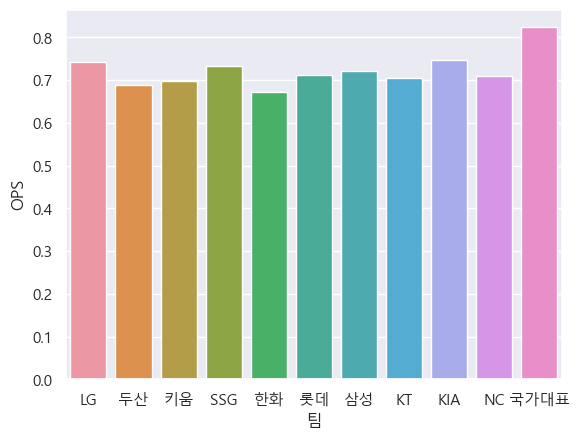

In [236]:
sns.barplot('팀','OPS', data = kbo_expand)